In [47]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from numpy import random as rd
%matplotlib inline
plt.rcParams['figure.figsize'] = [20, 8]
plt.rcParams['figure.dpi'] = 100 # 200 e.g. is really fine, but slower
sns.set_theme(context="notebook")

In [48]:
nSim = 5*10**4

energiaRuido = 0.99

alpha = 5/100

sinal = np.zeros((nSim,))
ruido = energiaRuido*rd.randn(nSim,)

limiar = np.quantile(ruido, 1-alpha)
print('Limiar:', limiar)

listaSNRs = np.arange(-20,16,1)
probDetec = np.zeros((len(listaSNRs),1))

# Simulação MC:
print('Simulando')
for i, SNRi in enumerate(listaSNRs):
    amplitude = 10**((SNRi/20)*(energiaRuido**2))

    for sim in range(0,nSim):
        sinal[sim] = energiaRuido*rd.randn(1) + amplitude

    probDetec[i] = np.mean(sinal>limiar)


print('Pronto')

Limiar: 1.61740509426563
Simulando
Pronto


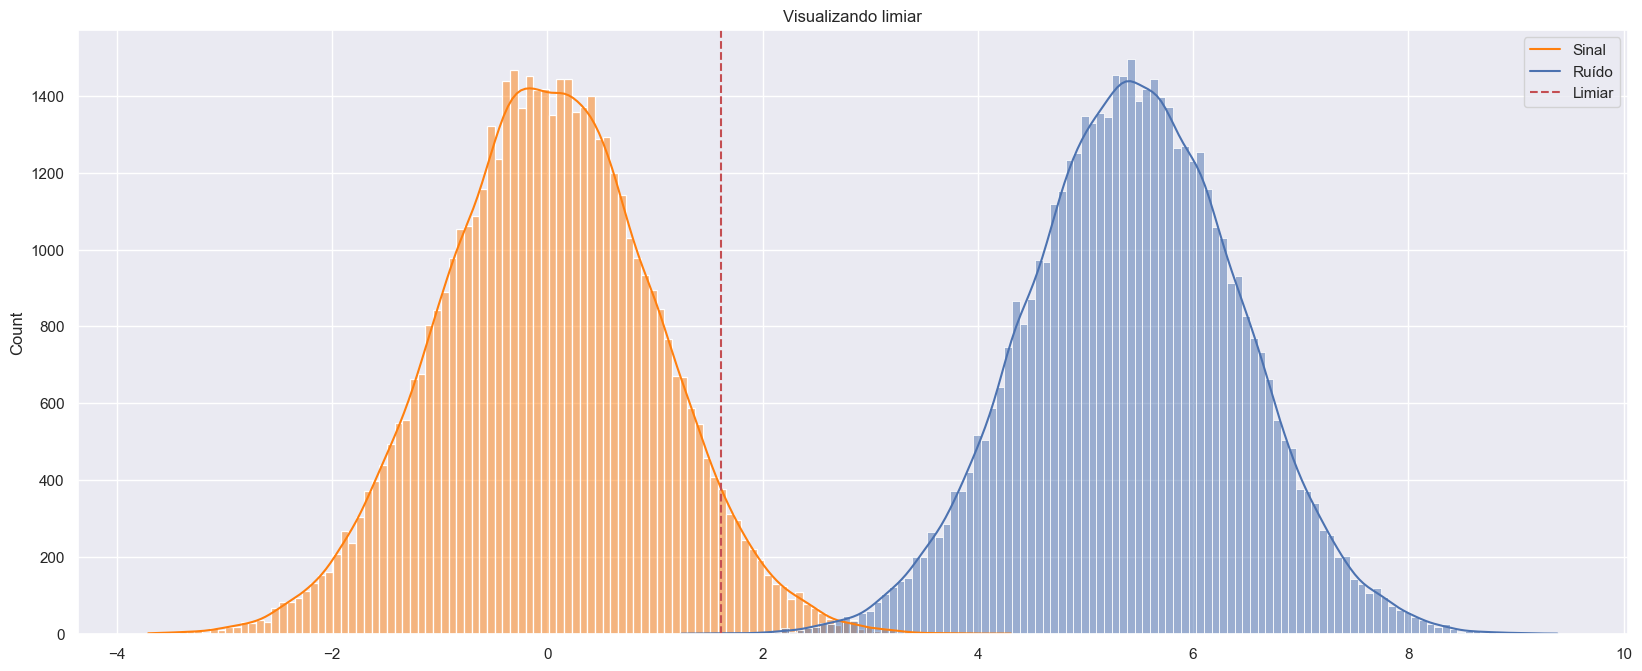

In [49]:
fig,ax = plt.subplots()
sns.histplot(x= ruido, kde= True,ax=fig.axes[0],color='tab:orange')  
sns.histplot(x= sinal, kde= True,ax=fig.axes[0])
plt.axvline(limiar, 0,1,c='r',linestyle='--')
fig.axes[0].set_title('Visualizando limiar')
plt.legend(['Sinal','Ruído','Limiar'])

plt.show()

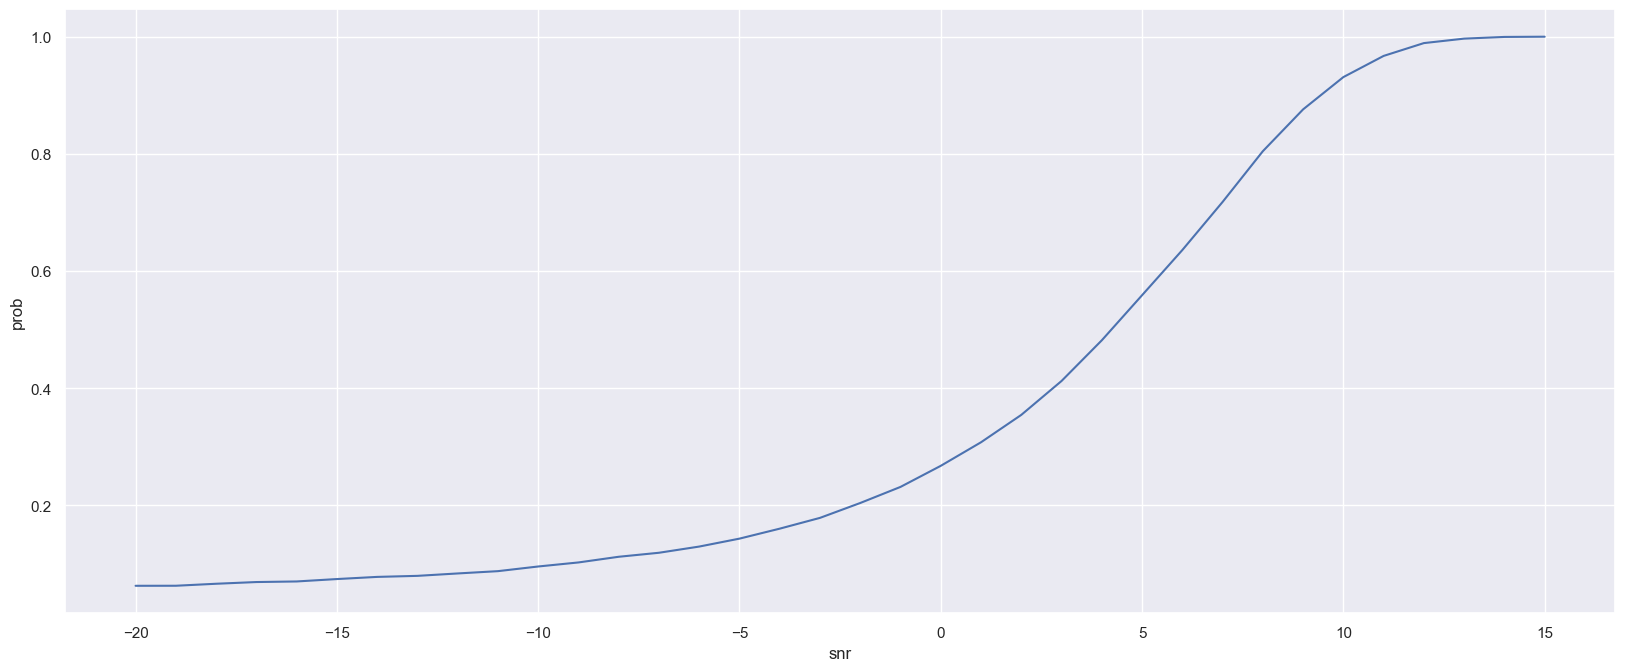

In [50]:
pD = pd.DataFrame({'snr': listaSNRs,'prob':probDetec[:,0]})
sns.lineplot(data = pD,x='snr',y='prob');